In [1]:
from analemma import orbit, plot as ap
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi
earth = orbit.PlanetParameters.earth()

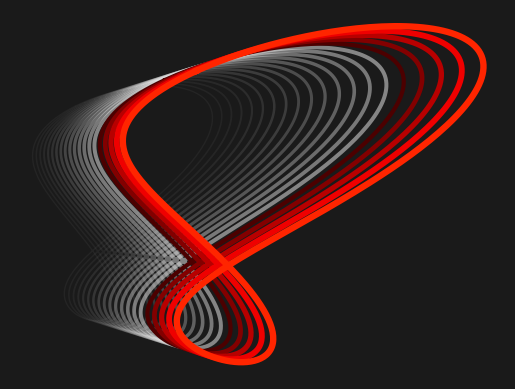

In [2]:
def analemma_logo(ax, color_map = "hot", grey_level = 0.9, min_width = 1, mid_width = 3, max_width = 5, map_min = 0.1, map_max = 0.5):

    latitude_degrees = 0.1
    thedial = ap.DialParameters(theta=(90 - latitude_degrees) / 180 * pi, iota=0, i=0, d=0)

    def _hour_offset(mins: float) -> float:
        return 5.1 + mins / 60

    min_mins = 0
    max_mins = 5

    def _linear(val: float, lower, upper, left, right) -> float:
        "Stay away from the edges of the colormap"
        frac = (val - lower) / (upper - lower)
        return left + frac * (right - left)

    def _quad(val: float, lower, upper, left, right) -> float:
        scale = (right-left)/(upper-lower)**2
        return scale*(val-lower)**2 + left

    if grey_level is not np.nan:
        # fade in from the left
        lower = -3*max_mins
        upper = min_mins
        for mins in np.arange(lower, upper):
            alpha = _quad(mins, lower, upper, 0.05, 0.6)
            line_width = _linear(mins, lower, upper, min_width, mid_width)
            ap.plot_analemma(
                ax,
                hour_offset=_hour_offset(mins),
                planet=earth,
                dial=thedial,
                linewidth=line_width,
                color=[grey_level]*3 + [alpha],
            )

    # main set of analemmas with nice colors
    cmap = plt.get_cmap(color_map)
    for mins in np.arange(min_mins, max_mins):
        line_width = _linear(mins, min_mins, max_mins, mid_width, max_width)
        ap.plot_analemma(
            ax,
            hour_offset=_hour_offset(mins),
            planet=earth,
            dial=thedial,
            linewidth=line_width,
            color=cmap(_linear(mins, min_mins, max_mins, map_min, map_max)),
        )


fig, ax = plt.subplots()
#ax.axis("equal")

analemma_logo(ax)

_ = plt.axis("off")
fig.patch.set_facecolor([0.1]*3)

plt.savefig("analemma_logo_dark_mode_red.svg", transparent=True)

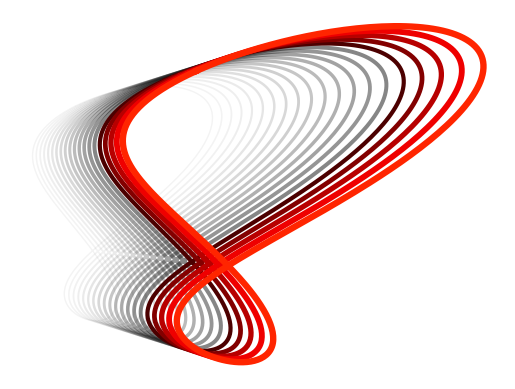

In [3]:

fig, ax = plt.subplots()
#ax.axis("equal")

analemma_logo(ax, "hot", grey_level=0.1)

plt.axis("off")

plt.savefig("analemma_logo_light_mode_red.svg", transparent=True)

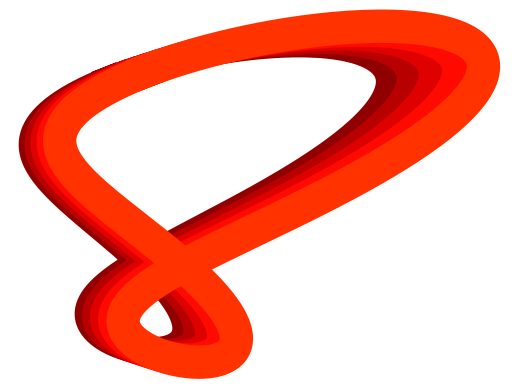

In [4]:
fig, ax = plt.subplots()

analemma_logo(ax, "hot", np.nan, 15, 20, 25, map_min = 0.2, map_max = 0.5)

_ = plt.axis("off")

plt.savefig("analemma_favicon.svg", transparent=True)